## Import Libraries

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import  Counter
import seaborn as sns
from sklearn.utils import shuffle

from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
import re
from spellchecker import SpellChecker
from wordcloud import WordCloud

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import math

wordnet_lemmatizer = WordNetLemmatizer()

In [2]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [3]:
print('Trainning Set Shape={}'.format(train.shape))
print('Trainning Set Shape={}'.format(test.shape))

Trainning Set Shape=(7613, 5)
Trainning Set Shape=(3263, 4)


## Accuracy check

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.shape

(7613, 5)

In [6]:
train['target'].value_counts(normalize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

In [7]:
train.isnull().sum() * 100 / len(train)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [8]:
test.isnull().sum() * 100 / len(test)

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

In [9]:
print('The unique values in Training location column: {}'.format(train['location'].unique().shape[0]))
print('The unique values in Testing location column: {}'.format(test['location'].unique().shape[0]))
print('The unique values in Training keyword column: {}'.format(train['keyword'].unique().shape[0]))
print('The unique values in Testing keywords column: {}'.format(test['keyword'].unique().shape[0]))

The unique values in Training location column: 3342
The unique values in Testing location column: 1603
The unique values in Training keyword column: 222
The unique values in Testing keywords column: 222


In [10]:
train[train['target']==1].groupby('keyword').count().sort_values(['id'],ascending=False)

,id,location,text,target
keyword,,,,
derailment,39,25,39,39
wreckage,39,28,39,39
outbreak,39,30,39,39
debris,37,22,37,37
oil%20spill,37,27,37,37
...,...,...,...,...
blazing,1,1,1,1
epicentre,1,1,1,1
body%20bag,1,1,1,1


In [11]:
train[train['target']==0].groupby('keyword').count().sort_values(['id'],ascending=False)

,id,location,text,target
keyword,,,,
body%20bags,40,22,40,40
harm,37,26,37,37
armageddon,37,28,37,37
wrecked,36,20,36,36
ruin,36,27,36,36
...,...,...,...,...
typhoon,1,1,1,1
suicide%20bombing,1,0,1,1
suicide%20bomber,1,0,1,1


## Meta Features

In [12]:
train.shape

(7613, 5)

In [13]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [15]:
len(train['keyword'].unique())

222

## Checking Not Null values of keword 

In [16]:
train.loc[train['keyword'].notnull(), ['keyword','target']]

,keyword,target
31,ablaze,1
32,ablaze,0
33,ablaze,1
34,ablaze,0
35,ablaze,0
...,...,...
7578,wrecked,0
7579,wrecked,0
7580,wrecked,0
7581,wrecked,0


In [17]:
train[train['keyword'] == 'wrecked']

,id,keyword,location,text,target
7544,10785,wrecked,"Brooklyn, NY",Wrecked an hour on YouTube with @julian_lage @...,0
7545,10786,wrecked,Robin Hood's County,late night mcdonalds with friends = hilarious ...,0
7546,10787,wrecked,NaN,good luck to everyone who has school soon but ...,0
7547,10788,wrecked,United States,I wonder how times someone has wrecked trying ...,0
7548,10789,wrecked,Pennsylvania,Four hundred wrecked cars (costing $100 apiece...,0
7549,10790,wrecked,NaN,Cramer: IgerÛªs 3 words that wrecked DisneyÛ...,0
7550,10793,wrecked,NaN,Poor Liv and I getting our phones wrecked on t...,0
7551,10794,wrecked,NaN,On the freeway to Africa til I wrecked my Audi,0
7552,10795,wrecked,"Santa Cruz, CA",Israel wrecked my home. Now it wants my land. ...,1
7553,10798,wrecked,NaN,#news Cramer: Iger's 3 words that wrecked Disn...,0


## Text Cleaning
### This dataset requires a lot of cleaning. 
#### Have to remove Punctuations, Urls, Special Characters, stoping words etc.

In [18]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Distribution

Text(0, 0.5, 'samples')

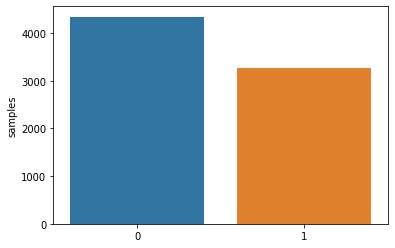

In [19]:
x=train.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

## Creating corpus 

In [20]:
def create_corpus(target):
    corpus=[]
    
    for doc in train[train['target']==target]['text'].str.split():
        for word in doc:
            word = word.lower()
            corpus.append(word)
    return corpus

### Let's look at commong stopwords and their frequencies

In [21]:
stop=set(stopwords.words('english'))

In [22]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

In [23]:
corpus

["what's",
 'up',
 'man?',
 'i',
 'love',
 'fruits',
 'summer',
 'is',
 'lovely',
 'my',
 'car',
 'is',
 'so',
 'fast',
 'what',
 'a',
 'goooooooaaaaaal!!!!!!',
 'this',
 'is',
 'ridiculous....',
 'london',
 'is',
 'cool',
 ';)',
 'love',
 'skiing',
 'what',
 'a',
 'wonderful',
 'day!',
 'looooool',
 'no',
 'way...i',
 "can't",
 'eat',
 'that',
 'shit',
 'was',
 'in',
 'nyc',
 'last',
 'week!',
 'love',
 'my',
 'girlfriend',
 'cooool',
 ':)',
 'do',
 'you',
 'like',
 'pasta?',
 'the',
 'end!',
 'we',
 'always',
 'try',
 'to',
 'bring',
 'the',
 'heavy.',
 '#metal',
 '#rt',
 'http://t.co/yao1e0xngw',
 'crying',
 'out',
 'for',
 'more!',
 'set',
 'me',
 'ablaze',
 'on',
 'plus',
 'side',
 'look',
 'at',
 'the',
 'sky',
 'last',
 'night',
 'it',
 'was',
 'ablaze',
 'http://t.co/qqsmshaj3n',
 '@phdsquares',
 '#mufc',
 "they've",
 'built',
 'so',
 'much',
 'hype',
 'around',
 'new',
 'acquisitions',
 'but',
 'i',
 'doubt',
 'they',
 'will',
 'set',
 'the',
 'epl',
 'ablaze',
 'this',
 'seas

<BarContainer object of 10 artists>

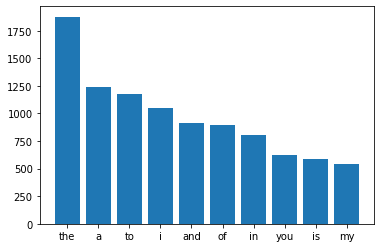

In [24]:
x,y=zip(*top)
plt.bar(x,y)

In [25]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 10 artists>

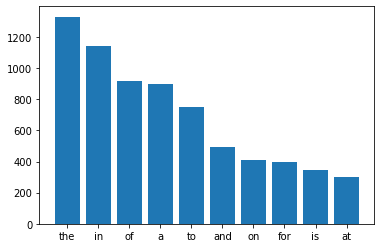

In [26]:
x,y=zip(*top)
plt.bar(x,y)

### Punctuations

#### Class 1

<BarContainer object of 18 artists>

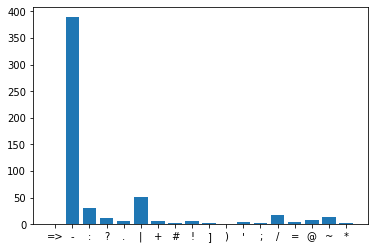

In [27]:
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

#### Class 0

<BarContainer object of 20 artists>

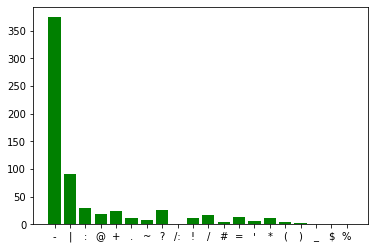

In [28]:
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

## Most Common words

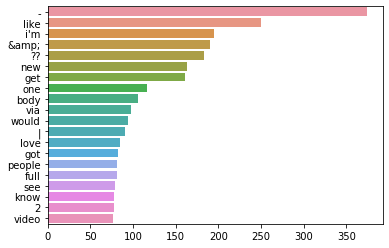

In [29]:
#Top 20 Common words
corpus=create_corpus(0)
start = 0
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:]:
    if start == 20:
        break
    if (word not in stop) :
        start += 1
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

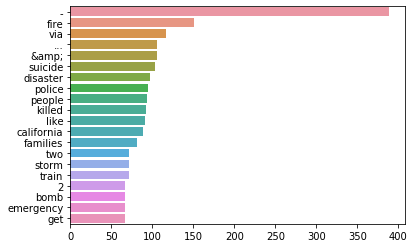

In [30]:
corpus=create_corpus(1)
start = 0
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:]:
    if start == 20:
        break
    if (word not in stop) :
        start += 1
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

### We can see that there are a lot of punctuations and unnecessary words. 

## Data Cleaning

In [31]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [32]:
text  = " ".join(train['text'])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(text)

In [33]:
text

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

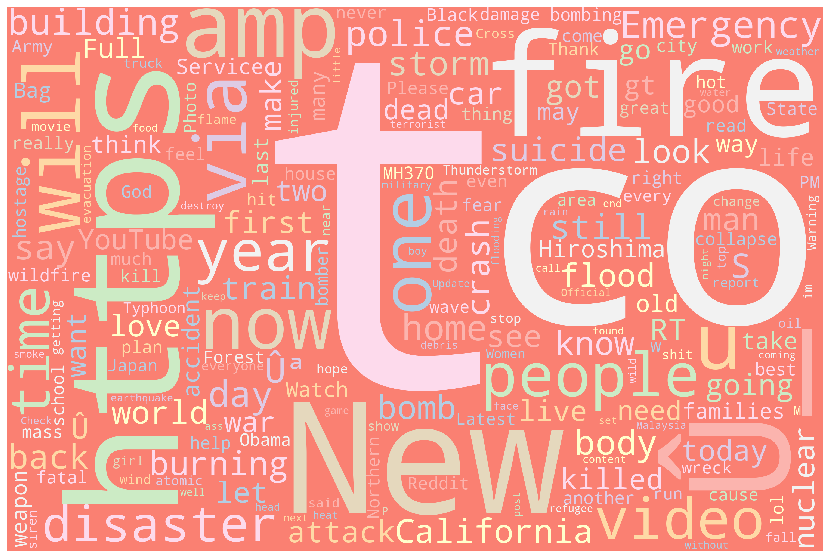

In [34]:
plot_cloud(wordcloud)

In [35]:
tweet = pd.concat([train, test], sort=False)
tweet.shape

(10876, 5)

In [36]:
#Removing URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#Remove Html Tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

#Removing Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Removing punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

#Removing stop words
def remove_stopwords(text):
    text = text.lower()
    text_tokens = nltk.tokenize.word_tokenize(text)
    text_tokens = [t for t in text_tokens if len(t.strip()) > 2] # remove short words, they're probably not useful
    text_tokens = [wordnet_lemmatizer.lemmatize(t) for t in text_tokens] # put words into base form
    token = [word for word in text_tokens if not word in stop] # remove stop words
    token = ' '.join(token)
    return token

In [37]:
tweet['text']=tweet['text'].apply(lambda x : remove_URL(x))
tweet['text']=tweet['text'].apply(lambda x : remove_html(x))
tweet['text']=tweet['text'].apply(lambda x : remove_emoji(x))
tweet['text']=tweet['text'].apply(lambda x : remove_punct(x))
tweet['text']=tweet['text'].apply(lambda x: remove_stopwords(x))

In [38]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive,1.0
1,4,NaN,NaN,forest fire near ronge sask canada,1.0
2,5,NaN,NaN,resident asked shelter place notified officer ...,1.0
3,6,NaN,NaN,13000 people receive wildfire evacuation order...,1.0
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1.0


## Let's see the data

In [39]:
text  = " ".join(tweet['text'][:7613])

In [40]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(text)

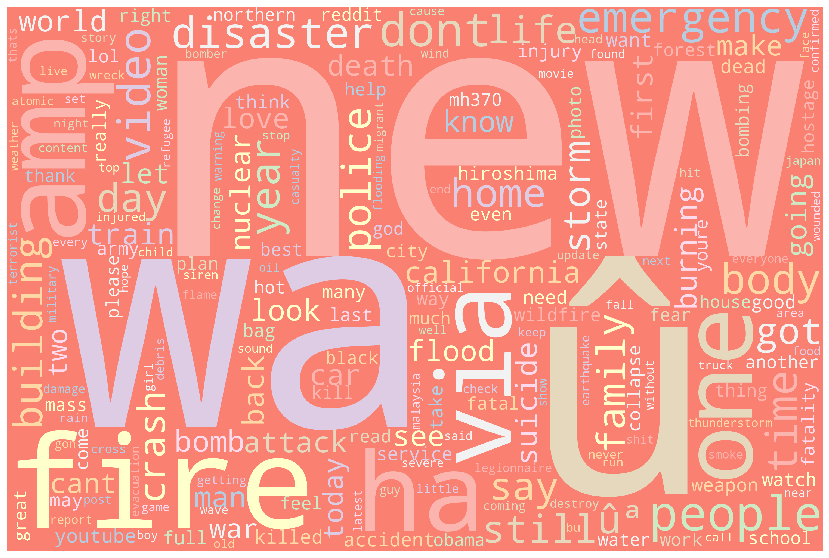

In [41]:
plot_cloud(wordcloud)

In [42]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive,1.0
1,4,NaN,NaN,forest fire near ronge sask canada,1.0
2,5,NaN,NaN,resident asked shelter place notified officer ...,1.0
3,6,NaN,NaN,13000 people receive wildfire evacuation order...,1.0
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1.0


## Word Index Map

In [43]:
current_index = 0
word_index_map = {}

In [44]:
len(word_index_map)

0

In [45]:
def wordIndexMap(text, current_index):
    tokens = nltk.tokenize.word_tokenize(text)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1
    return current_index

In [46]:
text_list = tweet['text'].tolist()
for each_text in text_list:
    current_index = wordIndexMap(each_text, current_index)

In [47]:
word_index_map

{'deed': 0,
 'reason': 1,
 'earthquake': 2,
 'may': 3,
 'allah': 4,
 'forgive': 5,
 'forest': 6,
 'fire': 7,
 'near': 8,
 'ronge': 9,
 'sask': 10,
 'canada': 11,
 'resident': 12,
 'asked': 13,
 'shelter': 14,
 'place': 15,
 'notified': 16,
 'officer': 17,
 'evacuation': 18,
 'order': 19,
 'expected': 20,
 '13000': 21,
 'people': 22,
 'receive': 23,
 'wildfire': 24,
 'california': 25,
 'got': 26,
 'sent': 27,
 'photo': 28,
 'ruby': 29,
 'alaska': 30,
 'smoke': 31,
 'pours': 32,
 'school': 33,
 'rockyfire': 34,
 'update': 35,
 'hwy': 36,
 'closed': 37,
 'direction': 38,
 'due': 39,
 'lake': 40,
 'county': 41,
 'cafire': 42,
 'flood': 43,
 'disaster': 44,
 'heavy': 45,
 'rain': 46,
 'cause': 47,
 'flash': 48,
 'flooding': 49,
 'street': 50,
 'manitou': 51,
 'colorado': 52,
 'spring': 53,
 'area': 54,
 'top': 55,
 'hill': 56,
 'see': 57,
 'wood': 58,
 'emergency': 59,
 'happening': 60,
 'building': 61,
 'across': 62,
 'afraid': 63,
 'tornado': 64,
 'coming': 65,
 'three': 66,
 'died': 67,


## Converting words to vector

### Convert Text to tokens

In [48]:
def to_tokens(text):
    text_tokens = nltk.tokenize.word_tokenize(text)
    return text_tokens

In [49]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [50]:
tweet['text']=tweet['text'].apply(lambda x: to_tokens(x))

In [51]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deed, reason, earthquake, may, allah, forgive]",1.0
1,4,NaN,NaN,"[forest, fire, near, ronge, sask, canada]",1.0
2,5,NaN,NaN,"[resident, asked, shelter, place, notified, of...",1.0
3,6,NaN,NaN,"[13000, people, receive, wildfire, evacuation,...",1.0
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1.0


In [52]:
def words_to_vector(tokens, i):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        if t not in word_index_map:
            continue
        i = word_index_map[t]
        x[i] += 1
    if x.sum() == 0:
        print("No text in the row number", i, " row")
    x = x / x.sum()
    return x

In [53]:
data = np.zeros((len(tweet), len(word_index_map)))

In [54]:
data.shape

(10876, 20625)

In [55]:
for i in range(0, len(tweet)):
    data[i,:] = words_to_vector(tweet.iloc[i]['text'], i)

No text in the row number 7626  row


/Users/iamgrewal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [56]:
Xtrain = data[:7613,]

In [57]:
len(Xtrain[0])

20625

In [58]:
Xtest = data[7613:,]

In [59]:
Ytrain = np.array(tweet.iloc[:7613]['target'])

In [60]:
model = LogisticRegression()
model.fit(Xtrain, Ytrain)
print("Train accuracy:", model.score(Xtrain, Ytrain))

Train accuracy: 0.781820570077499


In [61]:
submission_label = pd.read_csv('./submission.csv')

In [62]:
Ytest = np.array(submission_label.iloc[:]['target'])

### Removing NA row from test set

In [63]:
Xtest = np.delete(Xtest, 13, 0)
Ytest = np.delete(Ytest, 13, 0)

## Prediction Score

In [64]:
print("Test accuracy:", model.score(Xtest, Ytest))

Test accuracy: 0.8059472716125077


In [65]:
disaster_coef_dict = {}
no_disaster_coef_dict = {}
disaster_text = []
no_disaster_text = []

In [66]:
threshold = 0.5
for word, index in iteritems(word_index_map):
    weight = model.coef_[0][index]
    if weight > threshold:
        disaster_coef_dict[word] = weight
        disaster_text.extend([word] * math.floor(weight*100))
    if weight < -threshold:
        no_disaster_coef_dict[word] = weight
        no_disaster_text.extend([word] * math.floor(-weight*100))

In [67]:
sorted(disaster_coef_dict.items(), key=lambda x:x[1],reverse=True)

[('fire', 4.081493699104847),
 ('california', 3.6050250024133557),
 ('hiroshima', 3.5836712674482474),
 ('train', 3.282192458354239),
 ('suicide', 3.070882343860248),
 ('killed', 2.977714347450897),
 ('wildfire', 2.8309411511518574),
 ('police', 2.6773575741440103),
 ('bombing', 2.6498321069284922),
 ('mh370', 2.5692265726482435),
 ('flood', 2.503154264024483),
 ('news', 2.3190670907803024),
 ('storm', 2.3077600260936633),
 ('building', 2.26965780385563),
 ('home', 2.2181612922901675),
 ('family', 2.1946430494012192),
 ('earthquake', 2.137397202354485),
 ('accident', 2.1078194791260763),
 ('migrant', 2.045402811663153),
 ('legionnaire', 2.0066739771359448),
 ('crash', 1.9725491667509414),
 ('japan', 1.914961522997542),
 ('atomic', 1.8781042943280828),
 ('warning', 1.8616679170790282),
 ('debris', 1.8251807362071857),
 ('disaster', 1.8236305903476278),
 ('severe', 1.821618904375435),
 ('bomber', 1.7928020180126274),
 ('northern', 1.774646226398076),
 ('nuclear', 1.7425800006180807),
 ('

In [68]:
sorted(no_disaster_coef_dict.items(), key=lambda x:x[1],reverse=True)

[('epicentre', -0.5001515916128398),
 ('pandemonium', -0.5004634782035908),
 ('yes', -0.5021846926330571),
 ('hey', -0.503570050256999),
 ('ha', -0.5037435281228537),
 ('space', -0.5052662972595887),
 ('turn', -0.5066586235530272),
 ('face', -0.5067288268867545),
 ('change', -0.5078205612284369),
 ('beyhive', -0.5087717226607744),
 ('survive', -0.5114992551175425),
 ('back', -0.5135747597754524),
 ('come', -0.5155543064465283),
 ('technology', -0.515840607425547),
 ('everything', -0.5187517533034597),
 ('quiz', -0.5254288845404718),
 ('looking', -0.5261617281782229),
 ('made', -0.5297030123636292),
 ('secret', -0.5314974046062327),
 ('apocalypse', -0.533791586695643),
 ('asshole', -0.5342714157700748),
 ('thunder', -0.534695593402814),
 ('sorry', -0.5347614194245798),
 ('read', -0.5358539235014794),
 ('tomorrow', -0.5374383370540112),
 ('cat', -0.5380881527562039),
 ('lord', -0.540698829978958),
 ('king', -0.5427531700225571),
 ('danger', -0.5461352580127643),
 ('art', -0.5465880821031

In [69]:
disaster_text_parameters = ' '.join(disaster_text[:])

In [70]:
no_disaster_text_parameters = ' '.join(no_disaster_text[:])

In [71]:
wordcloud_1 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Set2', collocations=False).generate(disaster_text_parameters)

## Word colud for +ve weights (Disaster)

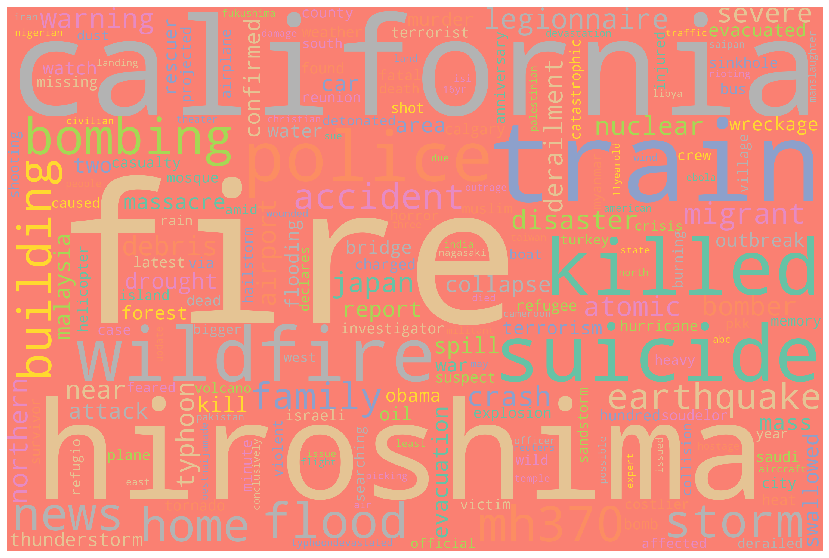

In [72]:
plot_cloud(wordcloud_1)

In [73]:
wordcloud_2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Set2', collocations=False).generate(no_disaster_text_parameters)

## Word colud for +ve weights (Not a Disaster)

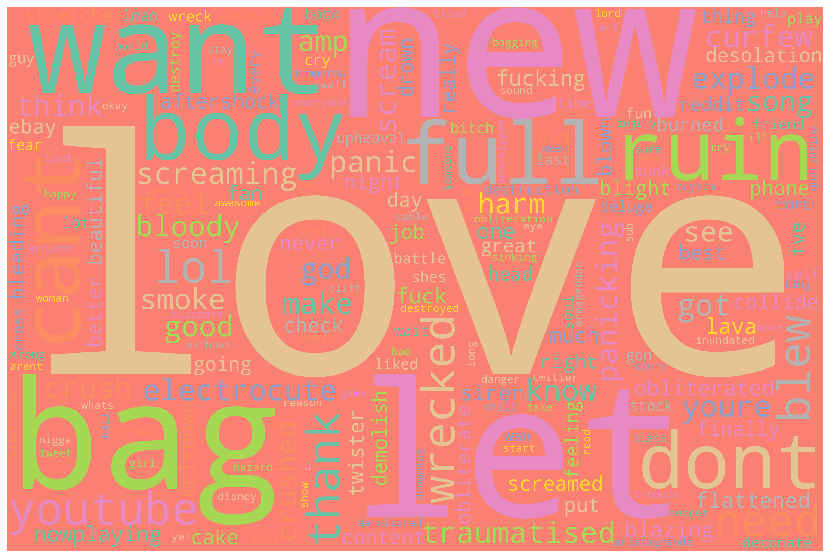

In [74]:
plot_cloud(wordcloud_2)

## Query

In [75]:
query = "Forest Fire in california"

In [76]:
q = words_to_vector((query.lower()).split(), 0)

In [77]:
if model.predict([q])[0] == 0:
    print("Not a Disaster")
else:
    print("Disaster")

Disaster
